Gather each of the three pieces of data as described below in a Jupyter Notebook titled `wrangle_act.ipynb`:

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

jump to [Assess](#Assess)

In [1]:
# Downloading TSV programatically as instructed by nr. 2 above
import requests
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', 'wb') as f:
    f.write(response.content)

In [1]:
import pandas as pd
import numpy as np
import json
import time

In [7]:
df = pd.read_csv('twitter-archive-enhanced.csv')
predictions = pd.read_csv('image-predictions.tsv', sep='\t')

jump to [JSON reading](#Reading-JSON-into-DataFrame)

In [14]:
#
# !! REMEMBER TO remove your keys and tokens !!
#
import tweepy

consumer_key = #'YOUR CONSUMER KEY'
consumer_secret = #'YOUR CONSUMER SECRET'
access_token = #'YOUR ACCESS TOKEN'
access_secret = #'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [3]:
df.iloc[:6,[0,3,5]]

,tweet_id,timestamp,text
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...


In [5]:
# testing the method to obtain a tweet's full text
#tweet = api.get_status(df.iloc[4,0], tweet_mode='extended')
tweet = api.get_status(df.iloc[2,0])
tweet.text

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.… https://t.co/r0YlrsGCgy'

In [40]:
tweet.retweet_count

4008

In [41]:
tweet.id

891815181378084864

In [43]:
# how about favorite (like) count?
tweet.favorite_count

24317

In [6]:
list(df.iloc[:20,0].values)

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257]

In [4]:
df.shape

(2356, 17)

In [38]:
#twt_list = list(df.iloc[:20,0].values)  # used to test the API gathering code
twt_list = list(df.iloc[:,0].values)

In [52]:
time.asctime()  # testing time function

'Tue May 14 11:48:37 2019'

In [39]:
#Gathering twitter data and inserting into JSON file

errors = []
twt_ids_tot = len(twt_list)
start = time.time()

with open('tweet-json.txt', 'w') as file:
    for twt_id in twt_list:
        try:
            # printing index to gauge time remaining
            ranking = twt_list.index(twt_id) + 1
            print('{} of {} : id {}'.format(ranking, twt_ids_tot, twt_id))
            status = api.get_status(twt_id, tweet_mode='extended')
            json.dump(status._json, file)
            file.write('\n')
            print('Wrote fo file')
        
        except tweepy.RateLimitError:
            print(time.asctime())
            print('Waiting 15 min')
            time.sleep(15 * 60)
            
        except Exception as e:
            print('\t EXCEPTION! list nr: {} , id: {} \n {}'.format(ranking, twt_id, e))
            errors.append(str(ranking) + "_" + str(twt_id))
      
    end = time.time()
    print(':: {} minutes to get twitter statuses @WeRateDogs'.format((end - start) / 60))

1 of 2356 : id 892420643555336193
Wrote fo file
2 of 2356 : id 892177421306343426
Wrote fo file
3 of 2356 : id 891815181378084864
Wrote fo file
4 of 2356 : id 891689557279858688
Wrote fo file
5 of 2356 : id 891327558926688256
Wrote fo file
6 of 2356 : id 891087950875897856
Wrote fo file
7 of 2356 : id 890971913173991426
Wrote fo file
8 of 2356 : id 890729181411237888
Wrote fo file
9 of 2356 : id 890609185150312448
Wrote fo file
10 of 2356 : id 890240255349198849
Wrote fo file
11 of 2356 : id 890006608113172480
Wrote fo file
12 of 2356 : id 889880896479866881
Wrote fo file
13 of 2356 : id 889665388333682689
Wrote fo file
14 of 2356 : id 889638837579907072
Wrote fo file
15 of 2356 : id 889531135344209921
Wrote fo file
16 of 2356 : id 889278841981685760
Wrote fo file
17 of 2356 : id 888917238123831296
Wrote fo file
18 of 2356 : id 888804989199671297
Wrote fo file
19 of 2356 : id 888554962724278272
Wrote fo file
20 of 2356 : id 888202515573088257
	 EXCEPTION! list nr: 20 , id: 888202515573

Wrote fo file
156 of 2356 : id 861769973181624320
	 EXCEPTION! list nr: 156 , id: 861769973181624320 
 [{'code': 144, 'message': 'No status found with that ID.'}]
157 of 2356 : id 861383897657036800
Wrote fo file
158 of 2356 : id 861288531465048066
Wrote fo file
159 of 2356 : id 861005113778896900
Wrote fo file
160 of 2356 : id 860981674716409858
Wrote fo file
161 of 2356 : id 860924035999428608
Wrote fo file
162 of 2356 : id 860563773140209665
Wrote fo file
163 of 2356 : id 860524505164394496
Wrote fo file
164 of 2356 : id 860276583193509888
Wrote fo file
165 of 2356 : id 860184849394610176
Wrote fo file
166 of 2356 : id 860177593139703809
Wrote fo file
167 of 2356 : id 859924526012018688
Wrote fo file
168 of 2356 : id 859851578198683649
Wrote fo file
169 of 2356 : id 859607811541651456
Wrote fo file
170 of 2356 : id 859196978902773760
Wrote fo file
171 of 2356 : id 859074603037188101
Wrote fo file
172 of 2356 : id 858860390427611136
Wrote fo file
173 of 2356 : id 858843525470990336
W

Wrote fo file
308 of 2356 : id 835685285446955009
Wrote fo file
309 of 2356 : id 835574547218894849
Wrote fo file
310 of 2356 : id 835536468978302976
Wrote fo file
311 of 2356 : id 835309094223372289
Wrote fo file
312 of 2356 : id 835297930240217089
Wrote fo file
313 of 2356 : id 835264098648616962
Wrote fo file
314 of 2356 : id 835246439529840640
Wrote fo file
315 of 2356 : id 835172783151792128
Wrote fo file
316 of 2356 : id 835152434251116546
Wrote fo file
317 of 2356 : id 834931633769889797
Wrote fo file
318 of 2356 : id 834786237630337024
Wrote fo file
319 of 2356 : id 834574053763584002
Wrote fo file
320 of 2356 : id 834477809192075265
Wrote fo file
321 of 2356 : id 834458053273591808
Wrote fo file
322 of 2356 : id 834209720923721728
Wrote fo file
323 of 2356 : id 834167344700198914
Wrote fo file
324 of 2356 : id 834089966724603904
Wrote fo file
325 of 2356 : id 834086379323871233
Wrote fo file
326 of 2356 : id 833863086058651648
Wrote fo file
327 of 2356 : id 833826103416520705


Wrote fo file
470 of 2356 : id 816829038950027264
Wrote fo file
471 of 2356 : id 816816676327063552
Wrote fo file
472 of 2356 : id 816697700272001025
Wrote fo file
473 of 2356 : id 816450570814898180
Wrote fo file
474 of 2356 : id 816336735214911488
Wrote fo file
475 of 2356 : id 816091915477250048
Wrote fo file
476 of 2356 : id 816062466425819140
Wrote fo file
477 of 2356 : id 816014286006976512
Wrote fo file
478 of 2356 : id 815990720817401858
Wrote fo file
479 of 2356 : id 815966073409433600
Wrote fo file
480 of 2356 : id 815745968457060357
Wrote fo file
481 of 2356 : id 815736392542261248
Wrote fo file
482 of 2356 : id 815639385530101762
Wrote fo file
483 of 2356 : id 815390420867969024
Wrote fo file
484 of 2356 : id 814986499976527872
Wrote fo file
485 of 2356 : id 814638523311648768
Wrote fo file
486 of 2356 : id 814578408554463233
Wrote fo file
487 of 2356 : id 814530161257443328
Wrote fo file
488 of 2356 : id 814153002265309185
Wrote fo file
489 of 2356 : id 813944609378369540


Wrote fo file
630 of 2356 : id 794355576146903043
Wrote fo file
631 of 2356 : id 794332329137291264
Wrote fo file
632 of 2356 : id 794205286408003585
Wrote fo file
633 of 2356 : id 793962221541933056
Wrote fo file
634 of 2356 : id 793845145112371200
Wrote fo file
635 of 2356 : id 793614319594401792
Wrote fo file
636 of 2356 : id 793601777308463104
Wrote fo file
637 of 2356 : id 793500921481273345
Wrote fo file
638 of 2356 : id 793286476301799424
Wrote fo file
639 of 2356 : id 793271401113350145
Wrote fo file
640 of 2356 : id 793256262322548741
Wrote fo file
641 of 2356 : id 793241302385262592
Wrote fo file
642 of 2356 : id 793226087023144960
Wrote fo file
643 of 2356 : id 793210959003287553
Wrote fo file
644 of 2356 : id 793195938047070209
Wrote fo file
645 of 2356 : id 793180763617361921
Wrote fo file
646 of 2356 : id 793165685325201412
Wrote fo file
647 of 2356 : id 793150605191548928
Wrote fo file
648 of 2356 : id 793135492858580992
Wrote fo file
649 of 2356 : id 793120401413079041


Wrote fo file
792 of 2356 : id 773704687002451968
Wrote fo file
793 of 2356 : id 773670353721753600
Wrote fo file
794 of 2356 : id 773547596996571136
Wrote fo file
795 of 2356 : id 773336787167145985
Wrote fo file
796 of 2356 : id 773308824254029826
Wrote fo file
797 of 2356 : id 773247561583001600
Wrote fo file
798 of 2356 : id 773191612633579521
Wrote fo file
799 of 2356 : id 772877495989305348
Wrote fo file
800 of 2356 : id 772826264096874500
Wrote fo file
801 of 2356 : id 772615324260794368
Wrote fo file
802 of 2356 : id 772581559778025472
Wrote fo file
803 of 2356 : id 772193107915964416
Wrote fo file
804 of 2356 : id 772152991789019136
Wrote fo file
805 of 2356 : id 772117678702071809
Wrote fo file
806 of 2356 : id 772114945936949249
Wrote fo file
807 of 2356 : id 772102971039580160
Wrote fo file
808 of 2356 : id 771908950375665664
Wrote fo file
809 of 2356 : id 771770456517009408
Wrote fo file
810 of 2356 : id 771500966810099713
Wrote fo file
811 of 2356 : id 771380798096281600


Rate limit reached. Sleeping for: 6


Wrote fo file
877 of 2356 : id 761004547850530816
Wrote fo file
878 of 2356 : id 760893934457552897
Wrote fo file
879 of 2356 : id 760656994973933572
Wrote fo file
880 of 2356 : id 760641137271070720
Wrote fo file
881 of 2356 : id 760539183865880579
Wrote fo file
882 of 2356 : id 760521673607086080
Wrote fo file
883 of 2356 : id 760290219849637889
Wrote fo file
884 of 2356 : id 760252756032651264
Wrote fo file
885 of 2356 : id 760190180481531904
Wrote fo file
886 of 2356 : id 760153949710192640
Wrote fo file
887 of 2356 : id 759943073749200896
Wrote fo file
888 of 2356 : id 759923798737051648
Wrote fo file
889 of 2356 : id 759846353224826880
Wrote fo file
890 of 2356 : id 759793422261743616
Wrote fo file
891 of 2356 : id 759566828574212096
Wrote fo file
892 of 2356 : id 759557299618865152
Wrote fo file
893 of 2356 : id 759447681597108224
Wrote fo file
894 of 2356 : id 759446261539934208
Wrote fo file
895 of 2356 : id 759197388317847553
Wrote fo file
896 of 2356 : id 759159934323924993


Wrote fo file
1039 of 2356 : id 744334592493166593
Wrote fo file
1040 of 2356 : id 744234799360020481
Wrote fo file
1041 of 2356 : id 744223424764059648
Wrote fo file
1042 of 2356 : id 743980027717509120
Wrote fo file
1043 of 2356 : id 743895849529389061
Wrote fo file
1044 of 2356 : id 743835915802583040
Wrote fo file
1045 of 2356 : id 743609206067040256
Wrote fo file
1046 of 2356 : id 743595368194129920
Wrote fo file
1047 of 2356 : id 743545585370791937
Wrote fo file
1048 of 2356 : id 743510151680958465
Wrote fo file
1049 of 2356 : id 743253157753532416
Wrote fo file
1050 of 2356 : id 743222593470234624
Wrote fo file
1051 of 2356 : id 743210557239623680
Wrote fo file
1052 of 2356 : id 742534281772302336
Wrote fo file
1053 of 2356 : id 742528092657332225
Wrote fo file
1054 of 2356 : id 742465774154047488
Wrote fo file
1055 of 2356 : id 742423170473463808
Wrote fo file
1056 of 2356 : id 742385895052087300
Wrote fo file
1057 of 2356 : id 742161199639494656
Wrote fo file
1058 of 2356 : id

Wrote fo file
1200 of 2356 : id 716791146589110272
Wrote fo file
1201 of 2356 : id 716730379797970944
Wrote fo file
1202 of 2356 : id 716447146686459905
Wrote fo file
1203 of 2356 : id 716439118184652801
Wrote fo file
1204 of 2356 : id 716285507865542656
Wrote fo file
1205 of 2356 : id 716080869887381504
Wrote fo file
1206 of 2356 : id 715928423106027520
Wrote fo file
1207 of 2356 : id 715758151270801409
Wrote fo file
1208 of 2356 : id 715733265223708672
Wrote fo file
1209 of 2356 : id 715704790270025728
Wrote fo file
1210 of 2356 : id 715696743237730304
Wrote fo file
1211 of 2356 : id 715680795826982913
Wrote fo file
1212 of 2356 : id 715360349751484417
Wrote fo file
1213 of 2356 : id 715342466308784130
Wrote fo file
1214 of 2356 : id 715220193576927233
Wrote fo file
1215 of 2356 : id 715200624753819648
Wrote fo file
1216 of 2356 : id 715009755312439296
Wrote fo file
1217 of 2356 : id 714982300363173890
Wrote fo file
1218 of 2356 : id 714962719905021952
Wrote fo file
1219 of 2356 : id

Wrote fo file
1361 of 2356 : id 703268521220972544
Wrote fo file
1362 of 2356 : id 703079050210877440
Wrote fo file
1363 of 2356 : id 703041949650034688
Wrote fo file
1364 of 2356 : id 702932127499816960
Wrote fo file
1365 of 2356 : id 702899151802126337
Wrote fo file
1366 of 2356 : id 702684942141153280
Wrote fo file
1367 of 2356 : id 702671118226825216
Wrote fo file
1368 of 2356 : id 702598099714314240
Wrote fo file
1369 of 2356 : id 702539513671897089
Wrote fo file
1370 of 2356 : id 702332542343577600
Wrote fo file
1371 of 2356 : id 702321140488925184
Wrote fo file
1372 of 2356 : id 702276748847800320
Wrote fo file
1373 of 2356 : id 702217446468493312
Wrote fo file
1374 of 2356 : id 701981390485725185
Wrote fo file
1375 of 2356 : id 701952816642965504
Wrote fo file
1376 of 2356 : id 701889187134500865
Wrote fo file
1377 of 2356 : id 701805642395348998
Wrote fo file
1378 of 2356 : id 701601587219795968
Wrote fo file
1379 of 2356 : id 701570477911896070
Wrote fo file
1380 of 2356 : id

Wrote fo file
1522 of 2356 : id 690690673629138944
Wrote fo file
1523 of 2356 : id 690649993829576704
Wrote fo file
1524 of 2356 : id 690607260360429569
Wrote fo file
1525 of 2356 : id 690597161306841088
Wrote fo file
1526 of 2356 : id 690400367696297985
Wrote fo file
1527 of 2356 : id 690374419777196032
Wrote fo file
1528 of 2356 : id 690360449368465409
Wrote fo file
1529 of 2356 : id 690348396616552449
Wrote fo file
1530 of 2356 : id 690248561355657216
Wrote fo file
1531 of 2356 : id 690021994562220032
Wrote fo file
1532 of 2356 : id 690015576308211712
Wrote fo file
1533 of 2356 : id 690005060500217858
Wrote fo file
1534 of 2356 : id 689999384604450816
Wrote fo file
1535 of 2356 : id 689993469801164801
Wrote fo file
1536 of 2356 : id 689977555533848577
Wrote fo file
1537 of 2356 : id 689905486972461056
Wrote fo file
1538 of 2356 : id 689877686181715968
Wrote fo file
1539 of 2356 : id 689835978131935233
Wrote fo file
1540 of 2356 : id 689661964914655233
Wrote fo file
1541 of 2356 : id

Wrote fo file
1683 of 2356 : id 681891461017812993
Wrote fo file
1684 of 2356 : id 681694085539872773
Wrote fo file
1685 of 2356 : id 681679526984871937
Wrote fo file
1686 of 2356 : id 681654059175129088
Wrote fo file
1687 of 2356 : id 681610798867845120
Wrote fo file
1688 of 2356 : id 681579835668455424
Wrote fo file
1689 of 2356 : id 681523177663676416
Wrote fo file
1690 of 2356 : id 681340665377193984
Wrote fo file
1691 of 2356 : id 681339448655802368
Wrote fo file
1692 of 2356 : id 681320187870711809
Wrote fo file
1693 of 2356 : id 681302363064414209
Wrote fo file
1694 of 2356 : id 681297372102656000
Wrote fo file
1695 of 2356 : id 681281657291280384
Wrote fo file
1696 of 2356 : id 681261549936340994
Wrote fo file
1697 of 2356 : id 681242418453299201
Wrote fo file
1698 of 2356 : id 681231109724700672
Wrote fo file
1699 of 2356 : id 681193455364796417
Wrote fo file
1700 of 2356 : id 680970795137544192
Wrote fo file
1701 of 2356 : id 680959110691590145
Wrote fo file
1702 of 2356 : id

Rate limit reached. Sleeping for: 499


Wrote fo file
1777 of 2356 : id 677961670166224897
Wrote fo file
1778 of 2356 : id 677918531514703872
Wrote fo file
1779 of 2356 : id 677895101218201600
Wrote fo file
1780 of 2356 : id 677716515794329600
Wrote fo file
1781 of 2356 : id 677700003327029250
Wrote fo file
1782 of 2356 : id 677698403548192770
Wrote fo file
1783 of 2356 : id 677687604918272002
Wrote fo file
1784 of 2356 : id 677673981332312066
Wrote fo file
1785 of 2356 : id 677662372920729601
Wrote fo file
1786 of 2356 : id 677644091929329666
Wrote fo file
1787 of 2356 : id 677573743309385728
Wrote fo file
1788 of 2356 : id 677565715327688705
Wrote fo file
1789 of 2356 : id 677557565589463040
Wrote fo file
1790 of 2356 : id 677547928504967168
Wrote fo file
1791 of 2356 : id 677530072887205888
Wrote fo file
1792 of 2356 : id 677335745548390400
Wrote fo file
1793 of 2356 : id 677334615166730240
Wrote fo file
1794 of 2356 : id 677331501395156992
Wrote fo file
1795 of 2356 : id 677328882937298944
Wrote fo file
1796 of 2356 : id

Wrote fo file
1938 of 2356 : id 673919437611909120
Wrote fo file
1939 of 2356 : id 673906403526995968
Wrote fo file
1940 of 2356 : id 673887867907739649
Wrote fo file
1941 of 2356 : id 673716320723169284
Wrote fo file
1942 of 2356 : id 673715861853720576
Wrote fo file
1943 of 2356 : id 673711475735838725
Wrote fo file
1944 of 2356 : id 673709992831262724
Wrote fo file
1945 of 2356 : id 673708611235921920
Wrote fo file
1946 of 2356 : id 673707060090052608
Wrote fo file
1947 of 2356 : id 673705679337693185
Wrote fo file
1948 of 2356 : id 673700254269775872
Wrote fo file
1949 of 2356 : id 673697980713705472
Wrote fo file
1950 of 2356 : id 673689733134946305
Wrote fo file
1951 of 2356 : id 673688752737402881
Wrote fo file
1952 of 2356 : id 673686845050527744
Wrote fo file
1953 of 2356 : id 673680198160809984
Wrote fo file
1954 of 2356 : id 673662677122719744
Wrote fo file
1955 of 2356 : id 673656262056419329
Wrote fo file
1956 of 2356 : id 673636718965334016
Wrote fo file
1957 of 2356 : id

Wrote fo file
2099 of 2356 : id 670727704916926465
Wrote fo file
2100 of 2356 : id 670717338665226240
Wrote fo file
2101 of 2356 : id 670704688707301377
Wrote fo file
2102 of 2356 : id 670691627984359425
Wrote fo file
2103 of 2356 : id 670679630144274432
Wrote fo file
2104 of 2356 : id 670676092097810432
Wrote fo file
2105 of 2356 : id 670668383499735048
Wrote fo file
2106 of 2356 : id 670474236058800128
Wrote fo file
2107 of 2356 : id 670468609693655041
Wrote fo file
2108 of 2356 : id 670465786746662913
Wrote fo file
2109 of 2356 : id 670452855871037440
Wrote fo file
2110 of 2356 : id 670449342516494336
Wrote fo file
2111 of 2356 : id 670444955656130560
Wrote fo file
2112 of 2356 : id 670442337873600512
Wrote fo file
2113 of 2356 : id 670435821946826752
Wrote fo file
2114 of 2356 : id 670434127938719744
Wrote fo file
2115 of 2356 : id 670433248821026816
Wrote fo file
2116 of 2356 : id 670428280563085312
Wrote fo file
2117 of 2356 : id 670427002554466305
Wrote fo file
2118 of 2356 : id

Wrote fo file
2260 of 2356 : id 667550904950915073
Wrote fo file
2261 of 2356 : id 667550882905632768
Wrote fo file
2262 of 2356 : id 667549055577362432
Wrote fo file
2263 of 2356 : id 667546741521195010
Wrote fo file
2264 of 2356 : id 667544320556335104
Wrote fo file
2265 of 2356 : id 667538891197542400
Wrote fo file
2266 of 2356 : id 667534815156183040
Wrote fo file
2267 of 2356 : id 667530908589760512
Wrote fo file
2268 of 2356 : id 667524857454854144
Wrote fo file
2269 of 2356 : id 667517642048163840
Wrote fo file
2270 of 2356 : id 667509364010450944
Wrote fo file
2271 of 2356 : id 667502640335572993
Wrote fo file
2272 of 2356 : id 667495797102141441
Wrote fo file
2273 of 2356 : id 667491009379606528
Wrote fo file
2274 of 2356 : id 667470559035432960
Wrote fo file
2275 of 2356 : id 667455448082227200
Wrote fo file
2276 of 2356 : id 667453023279554560
Wrote fo file
2277 of 2356 : id 667443425659232256
Wrote fo file
2278 of 2356 : id 667437278097252352
Wrote fo file
2279 of 2356 : id

In [76]:
errors

['20_888202515573088257',
 '96_873697596434513921',
 '102_872668790621863937',
 '105_872261713294495745',
 '119_869988702071779329',
 '133_866816280283807744',
 '156_861769973181624320',
 '183_856602993587888130',
 '248_845459076796616705',
 '254_844704788403113984',
 '261_842892208864923648',
 '299_837012587749474308',
 '383_827228250799742977',
 '507_812747805718642688',
 '567_802247111496568832',
 '785_775096608509886464',
 '819_770743923962707968',
 '933_754011816964026368',
 '1727_680055455951884288']

jump to [Assess](#Assess)

## Reading JSON into DataFrame

In [2]:
# reading json file created from Twitter via dump
popularity = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        try:
            twt = json.loads(line)
            #print(twt['id'], twt['favorite_count'], twt['retweet_count'], twt['full_text'] )
            popularity.append({'id': str(twt['id']),'favorites': twt['favorite_count'],\
                               'retweets': twt['retweet_count']}) #, 'full_text': twt['full_text']})
        except Exception as e:
            print(e)

In [3]:
# Make a DataFrame out of a list of dictionaries
popularity = pd.DataFrame(popularity, columns=['id','favorites','retweets'])
popularity

,id,favorites,retweets
0,892420643555336193,37535,8188
1,892177421306343426,32260,6057
2,891815181378084864,24305,4007
3,891689557279858688,40873,8340
4,891327558926688256,39065,9033
5,891087950875897856,19647,3000
6,890971913173991426,11480,1984
7,890729181411237888,63320,18182
8,890609185150312448,27013,4119
9,890240255349198849,30952,7109


In [5]:
popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
id           2337 non-null object
favorites    2337 non-null int64
retweets     2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [6]:
popularity.shape

(2337, 3)

## Reading and Copying before cleaning

In [8]:
# copying before cleaning, but just this one so as to show I'm able to do it. 
# All the others can just be re-read from the original files (json and tsv) if needed
archive = df.copy()

In [7]:
archive.shape

(2356, 17)

In [79]:
archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [82]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [84]:
archive.expanded_urls[6]

'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1'

In [9]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [70]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [71]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [38]:
archive[['tweet_id', 'timestamp', 'rating_numerator']][archive.retweeted_status_id.notna()]

,tweet_id,timestamp,rating_numerator
19,888202515573088257,2017-07-21 01:02:36,13
32,886054160059072513,2017-07-15 02:45:48,12
36,885311592912609280,2017-07-13 01:35:06,13
68,879130579576475649,2017-06-26 00:13:58,14
73,878404777348136964,2017-06-24 00:09:53,13
74,878316110768087041,2017-06-23 18:17:33,11
78,877611172832227328,2017-06-21 19:36:23,14
91,874434818259525634,2017-06-13 01:14:41,12
95,873697596434513921,2017-06-11 00:25:14,14
97,873337748698140672,2017-06-10 00:35:19,12


In [78]:
popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
id            2337 non-null int64
retweets      2337 non-null int64
favourites    2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [9]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [87]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [88]:
archive.loc[0,'floofer']

'None'

In [109]:
archive[archive.expanded_urls.duplicated()].shape

(50, 14)

jump to [JSON reading](#Reading-JSON-into-DataFrame)

## Assess

### Quality

`archive` table

1. [retweeted columns](#Retweets) with non-null values indicate the rows which are retweets [x]
2. [timestamp column](#Timestamp) is of `str` type, should be `datetime` [x]
2. [column tweet_id](#Tweet_id) is of int type, should be str (object) [x]
3. 'None' string values indicating nulls on [dog stage columns](#Dog_stage), should be `np.nan` or `None` [x]
4. [rating_denominator](#Rating_denominator) max is 170, usually it is 10 [x]
4. [rating_numerator](#Rating_numerator) odd values (1776, 666 ...) [x]
5. ~~source and expanded_url values are truncated, making them useless (drop?)~~ (actually, they just **appear** truncated on pandas)
8. [odd dog names](#Odd_dog_names) (a, the, an and lowercase) [x]
9. [dog names null](#Null_dog_names) values are the str 'None', shoud be None (as a null) [x]
10. useless columns for analysis like 'source' and 'in\_reply'

`popularity` table

+ change column name 'id' to 'tweet_id' for consistency with other dfs

`predictions` table

11. ['tweet_id'](#Predictions) is int, shoud be str [x]
12. we are only interested in the [higher confidence](#Higher_confidence) breed predictions (p1_conf over 50%)
12. p\*\_dog columns indicate that some of the predictions are [not breeds](#Not_breeds) of dogs
13. Dog breeds have [inconsistent format](#Breed_names) (some are title case, other are lower)

### Tidiness

- one variable (dog stage) [split into 4 columns](#Melting) (doggo, floofler, pupper and puppo) in `archive` [_]
- same observational unit (twitter status) in [multiple tables](#Merging) (merge them?) [_]



## Clean

### Retweets

> `archive` retweeted columns with non-null values indicate the rows which are retweets

In [19]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> There are 179 rows that are indicated as retweets. Let's check them out before removing.

In [20]:
archive[archive.retweeted_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [21]:
archive = archive.loc[archive.retweeted_status_id.isna()]

In [22]:
# removing the no longer used columns
archive.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

In [23]:
# test
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


[scroll back to Assess](#Assess)

### Timestamp

> `archive` : timestamp column is of `str` type, should be `datetime`

In [24]:
archive.timestamp = pd.to_datetime(archive.timestamp, infer_datetime_format=True)

In [25]:
# TESTing conversion to datetime
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


In [26]:
archive.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

[scroll back to Assess](#Assess)

### Dog_stage

> `archive` 'None' string values indicating nulls on dog stage columns, should be `np.nan` or `None`

In [27]:
archive.iloc[:10,-4:]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None
8,None,None,None,None
9,doggo,None,None,None


In [28]:
type(archive.iloc[0,-1]), archive.iloc[0,-1]

(str, 'None')

In [29]:
# replacing str 'None' with np.nan so that null values are recognized as such in pandas
archive.iloc[:,-4:] = archive.iloc[:,-4:].replace('None', np.nan)

In [30]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 334.9+ KB


[scroll back to Assess](#Assess)

### Rating_denominator

> `archive` rating_denominator max is 170, usually it is 10

In [31]:
archive.rating_denominator.describe()

count    2175.000000
mean       10.492874
std         7.019084
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [32]:
archive[['text', 'rating_numerator', 'rating_denominator']][archive.rating_denominator != 10]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,99,90


In [33]:
wrong = _
wrong.index

Int64Index([ 313,  342,  433,  516,  902, 1068, 1120, 1165, 1202, 1228, 1254,
            1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843, 2335],
           dtype='int64')

In [34]:
for n in wrong.index:
    print(archive.loc[n, 'text'])

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@docmisterio account started on 11/15/15
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybo

In [35]:
len(wrong.index)

22

> From the tweets texts, one can observe that a few these ratings are related to more than one dog in the posted picture. Since they're only 22, I'll just drop them all.

In [36]:
# dropping rows with wrong rating denominator
archive.drop(wrong.index, axis=0, inplace=True)

In [37]:
# TESTing the drop
archive[['text', 'rating_numerator', 'rating_denominator']][archive.rating_denominator != 10]

,text,rating_numerator,rating_denominator


[scroll back to Assess](#Assess)

### Rating_numerator

> `archive` rating_numerator odd values (1776, 666 ...)

In [38]:
archive.rating_numerator.describe()

count    2153.000000
mean       12.250813
std        42.679419
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [39]:
archive[['tweet_id', 'text', 'timestamp', 'rating_numerator', 'rating_denominator']][archive.rating_numerator > 15]

,tweet_id,text,timestamp,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,2017-07-02 21:58:53,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10...,2017-04-22 19:15:32,420,10
189,855860136149123072,@s8n You tried very hard to portray this good ...,2017-04-22 19:05:32,666,10
290,838150277551247360,@markhoppus 182/10,2017-03-04 22:12:52,182,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",2016-10-13 23:23:56,75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,2016-09-20 00:24:34,27,10
979,749981277374128128,This is Atticus. He's quite simply America af....,2016-07-04 15:00:45,1776,10
1712,680494726643068929,Here we have uncovered an entire battalion of ...,2015-12-25 21:06:00,26,10
2074,670842764863651840,After so many requests... here you go.\n\nGood...,2015-11-29 05:52:33,420,10


In [40]:
wrong = _
wrong.index

Int64Index([55, 188, 189, 290, 695, 763, 979, 1712, 2074], dtype='int64')

In [41]:
for n in wrong.index:
    print(archive.loc[n, 'text'])

@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
@markhoppus 182/10
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY


In [42]:
len(wrong.index)

9

> It looks to me that most of these are outliers and two or three are floats, so I'll just drop them all.

In [43]:
# dropping rows with wrong rating numerator
archive.drop(wrong.index, axis=0, inplace=True)

In [44]:
# TESTing drop
archive[['text', 'rating_numerator', 'rating_denominator']][archive.rating_numerator > 15]

,text,rating_numerator,rating_denominator


[scroll back to Assess](#Assess)

### Tweet_id

> `archive` : column 'tweet_id' is of int type, should be str

In [45]:
archive.tweet_id = archive.tweet_id.astype('str')

In [46]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2144 non-null object
in_reply_to_status_id    69 non-null float64
in_reply_to_user_id      69 non-null float64
timestamp                2144 non-null datetime64[ns]
source                   2144 non-null object
text                     2144 non-null object
expanded_urls            2094 non-null object
rating_numerator         2144 non-null int64
rating_denominator       2144 non-null int64
name                     2144 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   233 non-null object
puppo                    25 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 251.2+ KB


[scroll back to Assess](#Assess)

### Odd_dog_names

> `archive` lower case odd names (a, the, an)

In [47]:
dog_names = archive.name.value_counts()
dog_names[dog_names > 5]

None       658
a           54
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Penny        9
Tucker       9
the          8
Sadie        8
Lola         8
Winston      8
Toby         7
Daisy        7
Koda         6
Jax          6
Stanley      6
Bailey       6
Oscar        6
Bella        6
Bo           6
Name: name, dtype: int64

In [48]:
archive[archive.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,NaN,NaN,NaN,NaN
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,NaN,NaN,pupper,NaN
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,quite,NaN,NaN,NaN,NaN
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12,10,quite,NaN,NaN,NaN,NaN
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,NaN,NaN,NaN,NaN
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",https://twitter.com/dog_rates/status/828650029...,14,10,one,NaN,NaN,NaN,NaN
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,NaN,NaN,NaN,NaN
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,NaN,NaN,NaN,NaN
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10,10,a,NaN,NaN,NaN,NaN
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/770655142...,11,10,very,NaN,NaN,NaN,NaN


In [49]:
wrong = _
wrong.index

Int64Index([  22,   56,  169,  193,  335,  369,  542,  649,  801,  819,
            ...
            2334, 2345, 2346, 2347, 2348, 2349, 2350, 2352, 2353, 2354],
           dtype='int64', length=101)

In [50]:
for n in wrong.index:
    print(archive.loc[n, 'text'], archive.loc[n, 'name'])

I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba such
Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF a
We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9 quite
Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x quite
There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7 not
Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK one
We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi incredibly
Here 

In [51]:
archive.name.head()

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

In [52]:
archive.name.head().str.istitle()

0    True
1    True
2    True
3    True
4    True
Name: name, dtype: bool

In [53]:
archive.name.where(archive.name.str.istitle(), np.nan, inplace=True)

[scroll back to Assess](#Assess)

### Null_dog_names

`archive` dog names null values are the str 'None', shoud be None (as a null)

In [54]:
archive.name = archive.name.replace('None', np.nan)

In [55]:
# TESTING removal of odd names and str 'None'
archive.name.str.islower().any()

False

In [56]:
archive.name.value_counts()

Lucy              11
Charlie           11
Oliver            10
Cooper            10
Tucker             9
Penny              9
Sadie              8
Winston            8
Lola               8
Toby               7
Daisy              7
Bo                 6
Jax                6
Stanley            6
Oscar              6
Bailey             6
Koda               6
Bella              6
Rusty              5
Milo               5
Buddy              5
Bentley            5
Chester            5
Dave               5
Leo                5
Scout              5
Louis              5
Reggie             4
Duke               4
Bear               4
                  ..
Loomis             1
Combo              1
Jazz               1
Michelangelope     1
Maks               1
Al                 1
Rumpole            1
Chadrick           1
Pavlov             1
Akumi              1
Snoopy             1
Tino               1
Karma              1
Reagan             1
Ralphé             1
Shelby             1
Lipton       

In [57]:
archive[['name','text']].sample(20)

,name,text
2324,NaN,*internally screaming* 12/10 https://t.co/YMcr...
153,Jersey,"This is Jersey. He likes to watch movies, but ..."
1580,Gordon,Meet Gordon. He's an asshole. 9/10 would still...
831,Lou,This is Lou. His sweater is too small and he a...
1146,NaN,When you're trying to enjoy yourself but end u...
1069,NaN,When the photographer forgets to tell you wher...
1451,Wyatt,This is Wyatt. His throne is modeled after him...
2284,NaN,*takes several long deep breaths* omg omg oMG ...
974,Jameson,This is Jameson. He had a few too many in the ...
2337,NaN,Very concerned about fellow dog trapped in com...


In [58]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2144 non-null object
in_reply_to_status_id    69 non-null float64
in_reply_to_user_id      69 non-null float64
timestamp                2144 non-null datetime64[ns]
source                   2144 non-null object
text                     2144 non-null object
expanded_urls            2094 non-null object
rating_numerator         2144 non-null int64
rating_denominator       2144 non-null int64
name                     1379 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   233 non-null object
puppo                    25 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 331.2+ KB


In [59]:
2144-1379

765

In [60]:
765/2144

0.3568097014925373

> Since we're here, I'll just get rid of columns that seem useless, like in_reply and source columns

In [112]:
archive.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'source'], inplace=True)
# TEST
archive.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

> So after cleaning, we have only **1379** non-null names out of 2144 @dogrates records

[scroll back to Assess](#Assess)

### Popularity

> Change column name for consistency accross different dataframes

In [115]:
popularity.rename(columns={'id': 'tweet_id'}, inplace=True)
popularity.columns

Index(['tweet_id', 'favorites', 'retweets'], dtype='object')

### Predictions

> `predictions` 'tweet_id' is int, shoud be str

In [61]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [62]:
predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
166,668981893510119424,https://pbs.twimg.com/media/CUize-0WEAAerAK.jpg,1,jellyfish,0.447246,False,coral_reef,0.238625,False,goldfish,0.040227,False
1854,841077006473256960,https://pbs.twimg.com/media/C6wbE5bXUAAh1Hv.jpg,1,Brittany_spaniel,0.962985,True,Blenheim_spaniel,0.014820,True,clumber,0.009557,True
280,671115716440031232,https://pbs.twimg.com/media/CVBILUgVAAA1ZUr.jpg,1,malinois,0.406341,True,kelpie,0.143366,True,dingo,0.129802,False
1847,839290600511926273,https://pbs.twimg.com/media/C6XBt9XXEAEEW9U.jpg,1,web_site,0.670892,False,monitor,0.101565,False,screen,0.075306,False
112,667911425562669056,https://pbs.twimg.com/media/CUTl5m1WUAAabZG.jpg,1,frilled_lizard,0.257695,False,ox,0.235160,False,triceratops,0.085317,False
559,677700003327029250,https://pbs.twimg.com/media/CWesj06W4AAIKl8.jpg,1,Siberian_husky,0.120849,True,junco,0.079206,False,malamute,0.063088,True
1285,750719632563142656,https://pbs.twimg.com/media/CmsXg9AWgAAs6Ui.jpg,1,Pembroke,0.972587,True,Cardigan,0.014772,True,basenji,0.005798,True
637,681261549936340994,https://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg,1,Tibetan_terrier,0.382101,True,miniature_poodle,0.095429,True,Maltese_dog,0.065738,True
1341,758828659922702336,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,1,Chesapeake_Bay_retriever,0.480048,True,vizsla,0.264522,True,Weimaraner,0.121840,True
1547,792773781206999040,https://pbs.twimg.com/media/CwB_i-zXEAEiP29.jpg,1,Yorkshire_terrier,0.912804,True,silky_terrier,0.067823,True,Australian_terrier,0.004451,True


In [63]:
predictions.tweet_id = predictions.tweet_id.astype('str')

In [64]:
# TESTING
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


[scroll back to Assess](#Assess)

### Higher_confidence

> We are only interested in the higher confidence breed predictions (p1_conf over 50%)

In [92]:
predictions = predictions[predictions.p1_conf > 0.50]

In [93]:
#TEST
predictions[predictions.p1_conf <= 0.50]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [94]:
predictions.shape

(1239, 12)

### Not_breeds

> p*_dog indicate that some of the predictions are not breeds of dogs

In [96]:
# let's keep only those which are breeds of dogs
predictions = predictions[predictions.p1_dog]

In [98]:
#TEST
predictions.p1_dog.all()

True

In [100]:
predictions[predictions.duplicated(subset='tweet_id')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [102]:
# now we select only what we are interested in for potential analysis. I say only id and p1
predictions = predictions[['tweet_id', 'p1']]

[scroll back to Assess](#Assess)

### Breed_names

> Make all breeds lower case, with no spaces

In [104]:
predictions.p1 = predictions.p1.str.strip().str.lower().str.replace(' ', '_')

In [105]:
#TESTING
predictions.p1.value_counts()

golden_retriever               126
pembroke                        71
labrador_retriever              69
chihuahua                       50
pug                             45
samoyed                         32
pomeranian                      29
chow                            26
toy_poodle                      24
french_bulldog                  22
german_shepherd                 19
malamute                        18
cocker_spaniel                  16
maltese_dog                     15
cardigan                        14
shetland_sheepdog               12
miniature_pinscher              12
west_highland_white_terrier     11
chesapeake_bay_retriever        11
staffordshire_bullterrier       11
shih-tzu                        11
vizsla                          10
dalmatian                       10
bernese_mountain_dog            10
rottweiler                      10
eskimo_dog                       9
basset                           9
beagle                           9
great_pyrenees      

[scroll back to Assess](#Assess)

> Now I´ll just rename the p1 column for better description

In [123]:
predictions.rename(columns={'p1': 'breed_pred'}, inplace=True)
predictions.head()

,tweet_id,breed_pred
1,666029285002620928,redbone
2,666033412701032449,german_shepherd
4,666049248165822465,miniature_pinscher
5,666050758794694657,bernese_mountain_dog
7,666055525042405380,chow


## Tidiness

### Melting

> + one variable (dog stage) split into 4 columns (doggo, floofler, pupper and puppo) in archive [_]

In [65]:
archive.iloc[20:30,-4:]

,doggo,floofer,pupper,puppo
21,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN
29,NaN,NaN,pupper,NaN
30,NaN,NaN,NaN,NaN


In [66]:
archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [67]:
archive.columns[-4:]

Index(['doggo', 'floofer', 'pupper', 'puppo'], dtype='object')

In [68]:
archive.columns[:-4]

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name'],
      dtype='object')

In [69]:
# create temporary stage_df DataFrame to hold melted values from archive
stage_df = archive.melt(id_vars=['tweet_id'] ,value_vars=archive.columns[-4:], value_name='dog_stage')

In [70]:
stage_df.sample(15)

,tweet_id,variable,dog_stage
2016,668286279830867968,doggo,NaN
2804,768855141948723200,floofer,NaN
1300,692158366030913536,doggo,NaN
5210,733109485275860992,pupper,pupper
6703,833722901757046785,puppo,NaN
6392,666691418707132416,pupper,NaN
3608,682429480204398592,floofer,NaN
2346,846874817362120707,floofer,NaN
6825,814638523311648768,puppo,NaN
8513,667160273090932737,puppo,NaN


In [71]:
# verifying resulting df
stage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8576 entries, 0 to 8575
Data columns (total 3 columns):
tweet_id     8576 non-null object
variable     8576 non-null object
dog_stage    355 non-null object
dtypes: object(3)
memory usage: 201.1+ KB


In [72]:
# getting rid of null entries on the newly created column dog_stage
stage_df.dropna(subset=['dog_stage'], inplace=True)

In [73]:
stage_df.shape

(355, 3)

In [74]:
stage_df[stage_df.duplicated(subset='tweet_id', keep=False)]

,tweet_id,variable,dog_stage
162,855851453814013952,doggo,doggo
169,854010172552949760,doggo,doggo
375,817777686764523521,doggo,doggo
434,808106460588765185,doggo,doggo
459,802265048156610565,doggo,doggo
466,801115127852503040,doggo,doggo
558,785639753186217984,doggo,doggo
584,781308096455073793,doggo,doggo
712,759793422261743616,doggo,doggo
770,751583847268179968,doggo,doggo


In [75]:
_.shape

(24, 3)

> It seems there are more than one dog_stage for some tweet_id. Let's check the `archive` df to see if that's where this comes from.

In [79]:
archive[archive.tweet_id == '855851453814013952'][['tweet_id', 'text', 'doggo', 'pupper', 'puppo', 'floofer']]

,tweet_id,text,doggo,pupper,puppo,floofer
191,855851453814013952,Here's a puppo participating in the #ScienceMa...,doggo,NaN,puppo,NaN


In [80]:
archive[archive.tweet_id == '733109485275860992'][['tweet_id', 'text', 'doggo', 'pupper', 'puppo', 'floofer']]

,tweet_id,text,doggo,pupper,puppo,floofer
1113,733109485275860992,"Like father (doggo), like son (pupper). Both 1...",doggo,pupper,NaN,NaN


> Since there are 24 of these repeated entries, I'll drop them and only leave those which have a single dog_stage per tweet_id, in order to avoid duplicates when merging `archive` and `stage_df` later

In [81]:
stage_df.drop_duplicates(subset='tweet_id', keep=False, inplace=True)

In [82]:
# drop variable column too, created when melting
stage_df.drop(columns=['variable'], inplace=True)

In [83]:
#TESTING
stage_df[stage_df.duplicated(subset='tweet_id', keep=False)]

,tweet_id,dog_stage


In [84]:
stage_df.shape

(331, 2)

In [86]:
# Now we merge it with archive
archive = pd.merge(archive, stage_df, on=['tweet_id'], how='left')
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN,doggo


In [87]:
# and we drop the previous 4 columns for dog stage
archive.drop(columns=['doggo', 'pupper', 'puppo', 'floofer'], inplace=True)

In [88]:
# TESTING
print(archive.columns)
archive.shape

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')


(2144, 11)

[scroll back to Assess](#Assess)

### Merging

> + same observational unit (twitter status) in multiple tables (merge them?) [_]

In [124]:
predictions.head()

,tweet_id,breed_pred
1,666029285002620928,redbone
2,666033412701032449,german_shepherd
4,666049248165822465,miniature_pinscher
5,666050758794694657,bernese_mountain_dog
7,666055525042405380,chow


In [116]:
popularity.head()

,tweet_id,favorites,retweets
0,892420643555336193,37535,8188
1,892177421306343426,32260,6057
2,891815181378084864,24305,4007
3,891689557279858688,40873,8340
4,891327558926688256,39065,9033


In [120]:
popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id     2337 non-null object
favorites    2337 non-null int64
retweets     2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [113]:
archive.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [117]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2143
Data columns (total 8 columns):
tweet_id              2144 non-null object
timestamp             2144 non-null datetime64[ns]
text                  2144 non-null object
expanded_urls         2094 non-null object
rating_numerator      2144 non-null int64
rating_denominator    2144 non-null int64
name                  1379 non-null object
dog_stage             331 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 150.8+ KB


In [122]:
archive = pd.merge(archive, popularity, on='tweet_id', how='left', validate='one_to_one')

In [126]:
archive = pd.merge(archive, predictions, on='tweet_id', how='left', validate='1:1')

In [127]:
# Now let's see the final result
archive.tail()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,breed_pred
2139,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,104.0,41.0,miniature_pinscher
2140,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,288.0,135.0,NaN
2141,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,120.0,43.0,german_shepherd
2142,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,124.0,46.0,redbone
2143,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,2510.0,493.0,NaN


In [128]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2143
Data columns (total 11 columns):
tweet_id              2144 non-null object
timestamp             2144 non-null datetime64[ns]
text                  2144 non-null object
expanded_urls         2094 non-null object
rating_numerator      2144 non-null int64
rating_denominator    2144 non-null int64
name                  1379 non-null object
dog_stage             331 non-null object
favorites             2140 non-null float64
retweets              2140 non-null float64
breed_pred            927 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 201.0+ KB


In [130]:
archive[['retweets','favorites']].describe()

,retweets,favorites
count,2140.000000,2140.000000
mean,2600.013084,8468.642523
std,4622.567240,12443.086053
min,1.000000,51.000000
25%,565.750000,1798.000000
50%,1245.000000,3825.500000
75%,2986.000000,10571.750000
max,82432.000000,162088.000000


In [134]:
# for some odd reason (maybe because there are null values, favorites and retweets changed back into floats.
# I'll get them back into integer format that allow for null values
archive.retweets = archive.retweets.astype(dtype=pd.Int32Dtype())
archive.favorites = archive.favorites.astype(dtype=pd.Int32Dtype())

In [135]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2143
Data columns (total 11 columns):
tweet_id              2144 non-null object
timestamp             2144 non-null datetime64[ns]
text                  2144 non-null object
expanded_urls         2094 non-null object
rating_numerator      2144 non-null int64
rating_denominator    2144 non-null int64
name                  1379 non-null object
dog_stage             331 non-null object
favorites             2140 non-null Int32
retweets              2140 non-null Int32
breed_pred            927 non-null object
dtypes: Int32(2), datetime64[ns](1), int64(2), object(6)
memory usage: 188.4+ KB


In [136]:
archive.to_csv('twitter_archive_master.csv', index=False)

In [137]:
archive.sample(20)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,breed_pred
101,870656317836468226,2017-06-02 15:00:16,This is Cody. He zoomed too aggressively and t...,https://www.gofundme.com/help-fix-codys-torn-a...,13,10,Cody,NaN,12134,2593,pembroke
58,880095782870896641,2017-06-28 16:09:20,Please don't send in photos without dogs in th...,https://twitter.com/dog_rates/status/880095782...,11,10,NaN,NaN,26823,4193,NaN
821,747594051852075008,2016-06-28 00:54:46,Again w the sharks guys. This week is about do...,https://twitter.com/dog_rates/status/747594051...,11,10,NaN,NaN,3836,1110,NaN
1162,703079050210877440,2016-02-26 04:48:02,This is a Butternut Cumberfloof. It's not wind...,https://twitter.com/dog_rates/status/703079050...,11,10,NaN,NaN,7643,3248,pembroke
29,886267009285017600,2017-07-15 16:51:35,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,10,NaN,NaN,116,4,NaN
1339,689661964914655233,2016-01-20 04:13:20,Meet Luca. He's a Butternut Scooperfloof. Glor...,https://twitter.com/dog_rates/status/689661964...,12,10,Luca,NaN,3312,975,NaN
1964,669324657376567296,2015-11-25 01:20:08,Meet Ralf. He's a miniature Buick DiCaprio. Ca...,https://twitter.com/dog_rates/status/669324657...,11,10,Ralf,NaN,499,211,NaN
1672,675006312288268288,2015-12-10 17:37:00,Say hello to Mollie. This pic was taken after ...,https://twitter.com/dog_rates/status/675006312...,10,10,Mollie,pupper,1000,232,boxer
1525,679844490799091713,2015-12-24 02:02:12,This is Willie. He's floating away and needs y...,https://twitter.com/dog_rates/status/679844490...,10,10,Willie,NaN,2451,803,airedale
1275,693642232151285760,2016-01-31 03:49:30,Meet Freddery. He's a Westminster Toblerone. S...,https://twitter.com/dog_rates/status/693642232...,9,10,Freddery,NaN,2629,430,NaN


[scroll back to Assess](#Assess)

## Insights

In [155]:
archive.timestamp.describe()

count                    2144
unique                   2144
top       2016-09-12 15:10:21
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

> Q: What are the most popular dog names posted on WeRateDogs?

> A: Most popular names are Lucy, Charlie, Oliver, Cooper, Tucker and Penny.

In [138]:
archive.name.value_counts()

Lucy              11
Charlie           11
Oliver            10
Cooper            10
Tucker             9
Penny              9
Sadie              8
Winston            8
Lola               8
Toby               7
Daisy              7
Bo                 6
Jax                6
Stanley            6
Oscar              6
Bailey             6
Koda               6
Bella              6
Rusty              5
Milo               5
Buddy              5
Bentley            5
Chester            5
Dave               5
Leo                5
Scout              5
Louis              5
Reggie             4
Duke               4
Bear               4
                  ..
Loomis             1
Combo              1
Jazz               1
Michelangelope     1
Maks               1
Al                 1
Rumpole            1
Chadrick           1
Pavlov             1
Akumi              1
Snoopy             1
Tino               1
Karma              1
Reagan             1
Ralphé             1
Shelby             1
Lipton       

> Q : What were the breeds in the most popular tweets?

> A : Labrador retriever, Eskimo dog and Chihuahua.

In [141]:
archive.sort_values(['retweets', 'favorites'], ascending=False)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,breed_pred
850,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,162088,82432,labrador_retriever
888,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,NaN,doggo,119842,61045,eskimo_dog
437,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,NaN,125291,60133,chihuahua
342,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,NaN,puppo,138420,46999,NaN
62,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,NaN,102778,42843,NaN
367,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,91089,39558,NaN
439,806629075125202948,2016-12-07 22:38:52,"""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,13,10,NaN,NaN,79216,37613,NaN
118,866450705531457537,2017-05-22 00:28:40,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,120432,34950,french_bulldog
1560,678399652199309312,2015-12-20 02:20:55,This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,12,10,NaN,NaN,81371,33248,NaN
1623,676219687039057920,2015-12-14 01:58:31,This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,10,10,Kenneth,NaN,76946,32192,NaN


> Average, Median

In [142]:
archive.rating_numerator.describe()

count    2144.000000
mean       10.618937
std         2.195494
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        15.000000
Name: rating_numerator, dtype: float64

In [154]:
archive.breed_pred.value_counts()[:5]

golden_retriever      114
pembroke               70
labrador_retriever     63
chihuahua              47
pug                    43
Name: breed_pred, dtype: int64

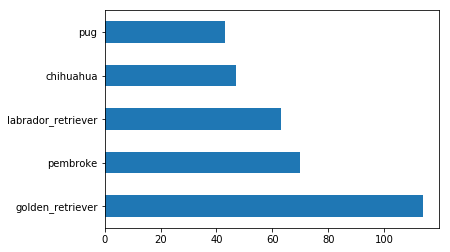

In [153]:
%matplotlib inline
# Histogram of breed predictions
archive.breed_pred.value_counts()[:5].plot.barh()

[scroll back to Assess](#Assess)

> TO DO:

- 8 **quality** issues and 2 **tidiness** issues
- Dont gather tweets after aug 1, 2017

[scroll back to Assess](#Assess)

## Key Points

> Key points to keep in mind when data wrangling for this project:
> - You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
> - Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
> - Cleaning includes merging individual pieces of data according to the rules of tidy data.
> - The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
> - You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

From JSON, get at least:

- "favourite_count"
- "retweet_count"
- "id"